In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv('cancer_reg.csv')

In [ ]:
df.head(5)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [ ]:
df_binary=df[['avganncount','avgdeathsperyear']]
df_binary.columns=['count','death']
df_binary.head()

,count,death
0,1397.0,469
1,173.0,70
2,102.0,50
3,427.0,202
4,57.0,26


In [ ]:
#df_binary['diagnosis'] = df_binary['diagnosis'].apply(lambda x: 0 if x=='M' else 1)

#df_binary.head()


In [ ]:
df_binary.isnull().sum()

count    0
death    0
dtype: int64

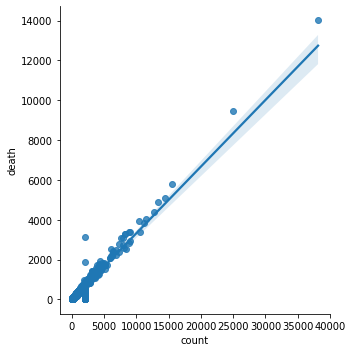

In [ ]:
sns.lmplot(x="count",y="death",data=df_binary)

In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(df_binary['count']).reshape(-1, 1)
y = np.array(df_binary['death']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_binary.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.7839945698563877


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


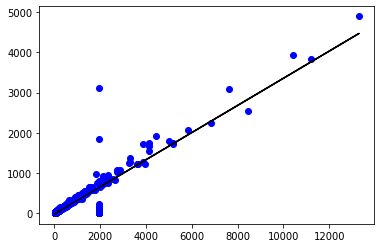

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

***LOGISTIC*** ***REGRESSION*** 

In [ ]:
data=pd.read_csv("lung_cancer.csv")

In [ ]:
print(data.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2                     

In [ ]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: 0 if x=='M' else 1)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
y = data['LUNG_CANCER']
X = data.drop(['LUNG_CANCER','GENDER'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [ ]:
Logmodel = LogisticRegression()
Logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred2 = Logmodel.predict(X_test)
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)
print(pred)
y_pred1 = [ 0 if x < 0.6 else 1 for x in pred]
y_pred1

[1.01937034 0.78454801 0.99388933 1.00986162 0.86452964 0.66253385
 1.08833795 0.61674293 0.89817578 1.04667627 0.95525582 0.87770527
 0.89531843 0.99689313 0.9968195  0.61321635 0.97490898 0.7850012
 1.06640183 0.90769491 0.80605884 1.17730147 0.87929675 0.89374666
 1.16248084 0.93193118 0.83108629 0.92731051 1.03154815 0.9968195
 0.99591222 0.74519776 1.04288069 0.77759268 0.96447482 0.8677491
 0.88509959 1.13117859 1.23642518 0.97229803 0.93193118 0.81706236
 1.00093383 0.69627656 0.51292907 1.06178116 0.96909549 0.45450043
 0.92052157 0.83475207 1.10329545 0.70420759 0.97973988 0.45286038
 0.89531843 0.64597891 0.83721145 1.13685497 1.04020951 1.08133128
 1.20964615 0.54887035 0.57596951 0.92502095 1.23180451 0.44431941
 0.65656407 0.82054277 1.17206579 1.20154015 0.89326767 0.57390508
 0.90013698 0.54860918 0.799057   0.80087804 1.05504648 0.53542412
 0.39219986 0.62968635 0.42205086 0.90700685 1.00029991 0.98002732
 0.84161216 0.87934398 0.85864838 0.77992734 1.00746389 0.9543262

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1]

In [ ]:
#Confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test,y_pred1)
cm2= confusion_matrix(y_test,y_pred2)
print("Confusin Matrix: ")
print(cm1)
print(cm2)

Confusin Matrix: 
[[ 13   9]
 [  6 127]]
[[  9  13]
 [  4 129]]


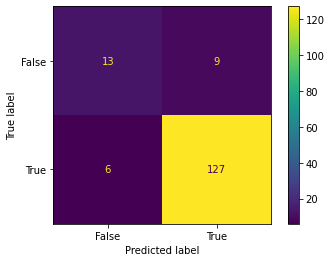

In [ ]:
#Linear Regression Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels =[False,True])
cm_display.plot()
plt.show()

In [ ]:
#Print Accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9032258064516129


0.7728981544771019


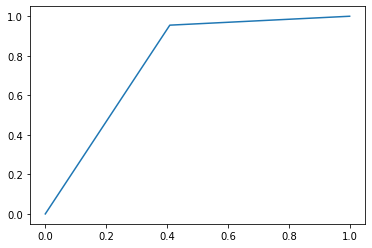

In [ ]:
#ROC Curve -Linear
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.plot(false_positive_rate,true_positive_rate)

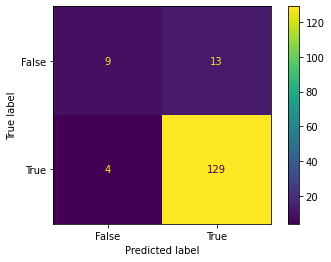

In [ ]:
#Logics Regression Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels =[False,True])
cm_display.plot()
plt.show()

In [ ]:
#Print Accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.8903225806451613


0.6895078605604921


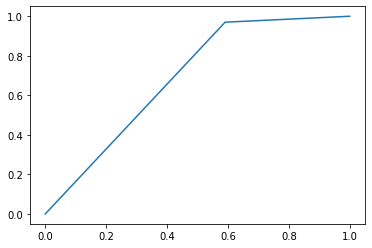

In [ ]:
#ROC Curve Logistic 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.plot(false_positive_rate,true_positive_rate)
